In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import warnings

df = pd.read_csv('https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/fatal-police-shootings-data.csv')
df.head(30)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
7,15,Brock Nichols,2015-01-06,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5505 entries, 0 to 5504
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5505 non-null   int64  
 1   name                     5505 non-null   object 
 2   date                     5505 non-null   object 
 3   manner_of_death          5505 non-null   object 
 4   armed                    5293 non-null   object 
 5   age                      5264 non-null   float64
 6   gender                   5504 non-null   object 
 7   race                     4943 non-null   object 
 8   city                     5505 non-null   object 
 9   state                    5505 non-null   object 
 10  signs_of_mental_illness  5505 non-null   bool   
 11  threat_level             5505 non-null   object 
 12  flee                     5247 non-null   object 
 13  body_camera              5505 non-null   bool   
dtypes: bool(2), float64(1), 

In [ ]:
B_brutality = df.query("race =='B'")

In [ ]:
B_brutality.head(30)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False
11,21,Ron Sneed,2015-01-07,shot,gun,31.0,M,B,Freeport,TX,False,attack,Not fleeing,False
12,22,Hashim Hanif Ibn Abdul-Rasheed,2015-01-07,shot,knife,41.0,M,B,Columbus,OH,True,other,Not fleeing,False
14,27,Omarr Julian Maximillian Jackson,2015-01-07,shot,gun,37.0,M,B,New Orleans,LA,False,attack,Foot,True
17,36,Artago Damon Howard,2015-01-08,shot,unarmed,36.0,M,B,Strong,AR,False,attack,Not fleeing,False
26,49,Marcus Golden,2015-01-14,shot,NaN,24.0,M,B,St. Paul,MN,False,attack,Not fleeing,False
28,51,Mario Jordan,2015-01-14,shot,gun,34.0,M,B,Chesapeake,VA,True,attack,Not fleeing,False
32,56,Donte Sowell,2015-01-15,shot,gun,27.0,M,B,Indianapolis,IN,False,attack,Foot,False
33,57,Kavonda Earl Payton,2015-01-15,shot,gun,39.0,M,B,Aurora,CO,False,attack,Not fleeing,False
39,74,Terence Walker,2015-01-17,shot,gun,21.0,M,B,Muskogee,OK,False,attack,Foot,True


In [ ]:
B_brutality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 9 to 5497
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1307 non-null   int64  
 1   name                     1307 non-null   object 
 2   date                     1307 non-null   object 
 3   manner_of_death          1307 non-null   object 
 4   armed                    1248 non-null   object 
 5   age                      1283 non-null   float64
 6   gender                   1307 non-null   object 
 7   race                     1307 non-null   object 
 8   city                     1307 non-null   object 
 9   state                    1307 non-null   object 
 10  signs_of_mental_illness  1307 non-null   bool   
 11  threat_level             1307 non-null   object 
 12  flee                     1256 non-null   object 
 13  body_camera              1307 non-null   bool   
dtypes: bool(2), float64(1), 

In [ ]:
start_date = "2020-01-01"

In [ ]:
date2020 = B_brutality["date"] >= start_date

In [ ]:
B_2020 = B_brutality.loc[date2020]

In [ ]:
B_2020.head(113)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
4937,5349,Jamari Daiwon Tarver,2020-01-02,shot,vehicle,26.0,M,B,North Las Vegas,NV,False,attack,Car,True
4941,5341,Tyree Davis,2020-01-04,shot and Tasered,knife,25.0,M,B,Chicago,IL,False,other,Not fleeing,False
4943,5335,Kwamae Jones,2020-01-05,shot,gun,17.0,M,B,Jacksonville,FL,False,attack,Car,False
4944,5336,Brandon D. Roberts,2020-01-05,shot,knife,27.0,M,B,Milford,DE,True,other,Not fleeing,False
4946,5352,Miciah Lee,2020-01-05,shot,gun,18.0,M,B,Sparks,NV,True,other,Car,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5478,5998,Darius Washington,2020-07-18,shot,gun,24.0,M,B,Chicago Heights,IL,False,attack,Foot,False
5479,5999,Vincent Harris,2020-07-20,shot,gun,51.0,M,B,Baton Rouge,LA,False,attack,Not fleeing,True
5482,6004,Southern Jeremy,2020-07-21,shot,gun,22.0,M,B,Sacramento,CA,False,attack,Not fleeing,True
5491,6010,David Earl Brooks,2020-07-27,shot,gun,45.0,M,B,Roxboro,NC,False,other,NaN,False


In [ ]:
B_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 4937 to 5497
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       113 non-null    int64  
 1   name                     113 non-null    object 
 2   date                     113 non-null    object 
 3   manner_of_death          113 non-null    object 
 4   armed                    113 non-null    object 
 5   age                      112 non-null    float64
 6   gender                   113 non-null    object 
 7   race                     113 non-null    object 
 8   city                     113 non-null    object 
 9   state                    113 non-null    object 
 10  signs_of_mental_illness  113 non-null    bool   
 11  threat_level             113 non-null    object 
 12  flee                     106 non-null    object 
 13  body_camera              113 non-null    bool   
dtypes: bool(2), float64(1)

In [ ]:
BM_2020 = B_2020.query("gender == 'M'")

In [ ]:
BM_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 4937 to 5497
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       112 non-null    int64  
 1   name                     112 non-null    object 
 2   date                     112 non-null    object 
 3   manner_of_death          112 non-null    object 
 4   armed                    112 non-null    object 
 5   age                      111 non-null    float64
 6   gender                   112 non-null    object 
 7   race                     112 non-null    object 
 8   city                     112 non-null    object 
 9   state                    112 non-null    object 
 10  signs_of_mental_illness  112 non-null    bool   
 11  threat_level             112 non-null    object 
 12  flee                     105 non-null    object 
 13  body_camera              112 non-null    bool   
dtypes: bool(2), float64(1)

In [ ]:
BM_2020.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
5478,5998,Darius Washington,2020-07-18,shot,gun,24.0,M,B,Chicago Heights,IL,False,attack,Foot,False
5479,5999,Vincent Harris,2020-07-20,shot,gun,51.0,M,B,Baton Rouge,LA,False,attack,Not fleeing,True
5482,6004,Southern Jeremy,2020-07-21,shot,gun,22.0,M,B,Sacramento,CA,False,attack,Not fleeing,True
5491,6010,David Earl Brooks,2020-07-27,shot,gun,45.0,M,B,Roxboro,NC,False,other,NaN,False
5497,6029,Darrien Walker,2020-07-30,shot and Tasered,sword,28.0,M,B,Detroit,MI,False,attack,Not fleeing,False


In [ ]:
BF_2020 = B_2020.query("gender == 'F'")

In [ ]:
BF_2020

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
5129,5626,Breonna Taylor,2020-03-12,shot,unarmed,26.0,F,B,Louisville,KY,False,undetermined,Not fleeing,False


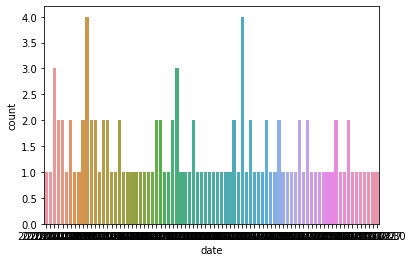

In [ ]:
sns.countplot(x="date", data=B_2020)

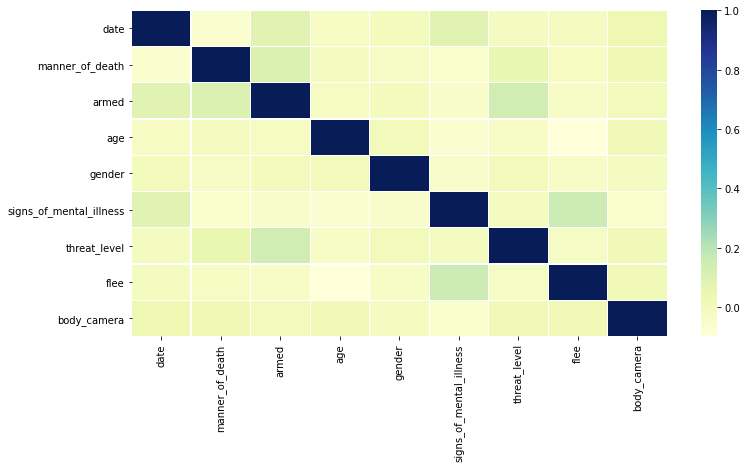

In [ ]:
plt.figure(figsize=(12, 6))
df.drop(['id', 'name', 'state', 'city', 'race'],
        axis=1, inplace=True)
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

In [ ]:
B_2020.to_excel('PoliceBrutalityTimeLine.xlsx')

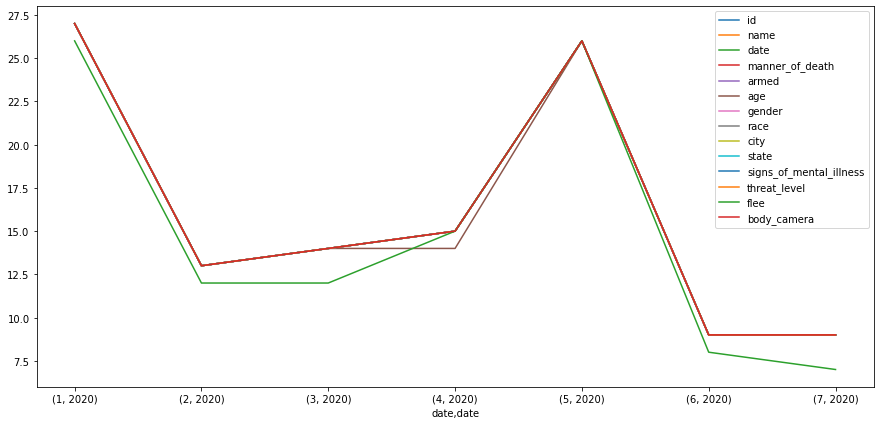

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
B_2020.index = pd.to_datetime(B_2020['date'],format='%Y-%m-%d')
B_2020.groupby(by=[B_2020.index.month, B_2020.index.year]).count().plot(ax=ax)

Text(0, 0.5, 'Number of Fatalities')

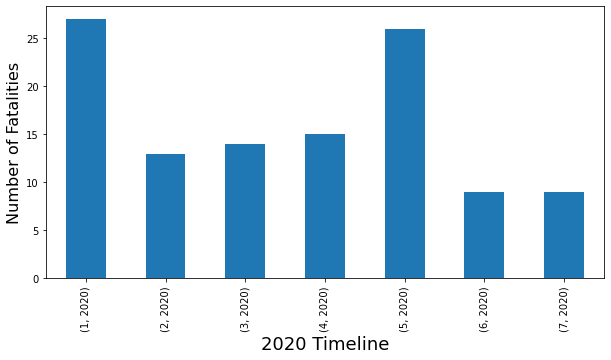

In [ ]:
week_groups = B_2020.groupby(by=[B_2020.index.month, B_2020.index.year])['id'].count()
week_groups.plot(kind='bar',figsize=(10,5),legend=None)
fig.suptitle('Police Brutality', fontsize=14, fontweight='bold')
plt.xlabel('2020 Timeline', fontsize=18)
plt.ylabel('Number of Fatalities', fontsize=16)


In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
data.groupby(['date','type']).count()['amount'].unstack().plot(ax=ax)

In [ ]:
df = pd.DataFrame({'date': pd.to_datetime(['2020-01-01', '2020-07-30']),
                   'Values': [5, 10]})

# normalize day to beginning of month
df['YearMonth'] = df['Date'] - pd.offsets.MonthBegin(1)

# two alternative methods
df['YearMonth'] = df['Date'] - pd.to_timedelta(df['Date'].dt.day-1, unit='D')
df['YearMonth'] = df['Date'].map(lambda dt: dt.replace(day=1))

g = df.groupby('YearMonth')

res = g['Values'].sum()